# Assignment 6 - Information retrieval using Speech data

#Data Collection

Use a tool or library to convert the speech in the YouTube video (https://www.youtube.com/watch?v=P73KmleCuBg) into text. This can involve speech-to-text algorithms or APIs.


In [1]:
import io
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install -U openai-whisper

In [6]:
#!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00


In [7]:
#Importing Pytube library
import pytube
# Reading the above Taken movie Youtube link
video = 'https://www.youtube.com/watch?v=P73KmleCuBg'
data = pytube.YouTube(video)
# Converting and downloading as 'MP3' file
audio = data.streams.get_audio_only()
audio.download()

'/content/This £10000 Electric Car Is About To Shock The World!!.mp4'

In [8]:
import whisper

In [9]:
audio_file = '/content/This £10000 Electric Car Is About To Shock The World!!.mp4'
modelWhisper = whisper.load_model("base")
result = modelWhisper.transcribe(audio_file,
    task='transcribe',
    temperature=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0),
    best_of=6,
    beam_size=5,
    suppress_tokens="-1",
    condition_on_previous_text=True,
    fp16=True,
    compression_ratio_threshold=2.4,
    logprob_threshold=-1.,
    no_speech_threshold=0.7)
print("\tTranscripts : "+result['text'])

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 118MiB/s]


	Transcripts :  Can a company that builds hundreds of thousands of affordable EVs every month, outdo themselves and produce the cheapest new EV on the market today? I mean, look at just how small this is compared to something like the BYD Dolphin, it's tiny. But what I want to know is, is this one compromise too many to fit that price or do they have a little gem on their hands? If you like the fully charged show, then you'll love our live events. Next up, we're in Amsterdam for fully charged live Europe on the 24th, 25th and 26th of November. As you all know, we love a tiny car on the fully charged show. So when BYD told me about the Seagull, I couldn't wait to try it. We're always trying to get more people out of SUVs and into different, smaller mobility solutions. It's also tip to be BYD's best-selling world car, likely for sale in the UK and Europe as well as Australasia and Southeast Asia and South America. This will compete on the same price basis as cheaper ice cars and dominate

In [10]:
result['text']

" Can a company that builds hundreds of thousands of affordable EVs every month, outdo themselves and produce the cheapest new EV on the market today? I mean, look at just how small this is compared to something like the BYD Dolphin, it's tiny. But what I want to know is, is this one compromise too many to fit that price or do they have a little gem on their hands? If you like the fully charged show, then you'll love our live events. Next up, we're in Amsterdam for fully charged live Europe on the 24th, 25th and 26th of November. As you all know, we love a tiny car on the fully charged show. So when BYD told me about the Seagull, I couldn't wait to try it. We're always trying to get more people out of SUVs and into different, smaller mobility solutions. It's also tip to be BYD's best-selling world car, likely for sale in the UK and Europe as well as Australasia and Southeast Asia and South America. This will compete on the same price basis as cheaper ice cars and dominate sales within 

#Text Preprocessing

Clean the text data by removing irrelevant information, such as non-verbal sounds, background noise, and filler words.
Tokenize the text into sentences, words, or phrases.

##Clean the text data

In [11]:
import re

transcript = result['text']  # Your Whisper model's output

# Define a list of filler words and patterns
fillers_and_patterns = [
    "uh", "um", "ah", "you know", "so", "like", "okay", "right",
    r"\[.*?\]"  # Pattern to match anything in square brackets (e.g., [applause])
]

# Function to clean text
def clean_transcript(text):
    for filler in fillers_and_patterns:
        # Replace filler words and patterns with an empty string
        text = re.sub(r'\b' + filler + r'\b', '', text)  # \b for word boundary
        text = re.sub(filler, '', text)  # For patterns
    return text

# Clean the transcript
cleaned_transcript = clean_transcript(transcript)

print(cleaned_transcript)

 Can a company that builds hundreds of thousands of affordable EVs every month, outdo themselves and produce the cheapest new EV on the market today? I mean, look at just how small this is compared to mething  the BYD Dolphin, it's tiny. But what I want to know is, is this one compromise too many to fit that price or do they have a little gem on their hands? If you  the fully charged show, then you'll love our live events. Next up, we're in Amsterdam for fully charged live Europe on the 24th, 25th and 26th of November. As you all know, we love a tiny car on the fully charged show. So when BYD told me about the Seagull, I couldn't wait to try it. We're always trying to get more people out of SUVs and into different, smaller mobility lutions. It's al tip to be BYD's best-selling world car, ly for sale in the UK and Europe as well as Australasia and Southeast Asia and South America. This will compete on the same price basis as cheaper ice cars and dominate sales within just a few months. 

##Tokenize the text

In [ ]:
!pip install transformers flair

In [14]:
from flair.data import Sentence
from flair.nn import Classifier
from flair.splitter import SegtokSentenceSplitter

In [78]:
# initialize sentence splitter
splitter = SegtokSentenceSplitter()

# use splitter to split text into list of sentences
sentences = splitter.split(cleaned_transcript)
import re

# Function to remove any form of numbering from a sentence
def remove_numbering(sentence_text):
    return re.sub(r'\[\d+\]|\d+\.', '', sentence_text).strip()

# Create a new list to hold the cleaned sentences
cleaned_sentences = []

# Process and store cleaned sentences
for sentence in sentences:
    clean_sentence = remove_numbering(sentence.text)
    cleaned_sentences.append(clean_sentence)

for i, sentence in enumerate(cleaned_sentences, start=1):
    print(f"Sentence {i}: {sentence}")
    print("-" * 50)  # Separator for readability

Sentence 1: Can a company that builds hundreds of thousands of affordable EVs every month, outdo themselves and produce the cheapest new EV on the market today?
--------------------------------------------------
Sentence 2: I mean, look at just how small this is compared to mething  the BYD Dolphin, it's tiny.
--------------------------------------------------
Sentence 3: But what I want to know is, is this one compromise too many to fit that price or do they have a little gem on their hands?
--------------------------------------------------
Sentence 4: If you  the fully charged show, then you'll love our live events.
--------------------------------------------------
Sentence 5: Next up, we're in Amsterdam for fully charged live Europe on the 24th, 25th and 26th of November.
--------------------------------------------------
Sentence 6: As you all know, we love a tiny car on the fully charged show.
--------------------------------------------------
Sentence 7: So when BYD told me abo

#Named Entity Recognition (NER):

Utilize NLP models or libraries (Hugging Face transformers) to identify and categorize entities mentioned in the text.
Extract entities such as names of people, organizations, locations, dates, etc.

In [70]:
from flair.models import SequenceTagger

In [69]:
# Load the NER tagger
tagger = SequenceTagger.load('ner-fast')

# Assuming 'cleaned_sentences' is your list of sentence strings
sentences = [Sentence(sentence) for sentence in cleaned_sentences]

# Predict entities for each sentence
tagger.predict(sentences)

# Iterate through sentences and print detected entities
for sentence in sentences:
    entities = sentence.get_spans('ner')
    for entity in entities:
        print(entity)

2023-12-10 06:21:14,092 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Span[14:16]: "BYD Dolphin" → MISC (0.7367)
Span[6:7]: "Amsterdam" → LOC (0.9997)
Span[11:12]: "Europe" → LOC (0.9977)
Span[2:3]: "BYD" → ORG (0.9337)
Span[7:8]: "Seagull" → MISC (0.5495)
Span[6:7]: "BYD" → ORG (0.9954)
Span[17:18]: "UK" → LOC (0.9948)
Span[19:20]: "Europe" → LOC (0.9997)
Span[23:24]: "Australasia" → LOC (0.9863)
Span[25:27]: "Southeast Asia" → LOC (0.981)
Span[28:30]: "South America" → LOC (0.9885)
Span[11:12]: "BYD" → ORG (0.9841)
Span[6:7]: "Seagull" → MISC (0.8134)
Span[9:14]: "Dolphin and the Ato III" → MISC (0.7486)
Span[12:14]: "Wolfgang Egger" → PER (0.9944)
Span[22:23]: "Lamborghini" → ORG (0.9514)
Span[3:4]: "Lamborghini" → ORG (0.8454)
Span[6:7]: "Seagull" → ORG (0.6677)
Span[3:4]: "Lamborghini" → ORG (0.821)
Span[5:7]: "Vitality Seagull" → MISC (

#Dependency Parsing:

Analyze the grammatical structure of sentences to understand relationships between words (subject, object, verb, etc.).
Use dependency parsing techniques to extract structured information from the text.

In [80]:
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process each sentence with SpaCy and analyze dependencies
for sentence_text in cleaned_sentences:
    # Process the sentence
    doc = nlp(sentence_text)

    # Analyze syntactic dependencies to infer relationships
    for token in doc:
        # Looking for subject-verb-object relationships
        if token.dep_ in ("nsubj", "nsubjpass") and token.head.pos_ in ("VERB"):
            subject = token.text
            verb = token.head.text
            object_ = None
            for child in token.head.children:
                if child.dep_ in ("dobj", "attr", "prep"):
                    object_ = child.text
                    break  # Break after finding the first object

            if object_:
                print(f"Sentence: {sentence_text}")
                print(f"Subject: {subject}, Verb: {verb}, Object: {object_}")
                print("-" * 50)  # Separator for readability


Sentence: Can a company that builds hundreds of thousands of affordable EVs every month, outdo themselves and produce the cheapest new EV on the market today?
Subject: that, Verb: builds, Object: thousands
--------------------------------------------------
Sentence: I mean, look at just how small this is compared to mething  the BYD Dolphin, it's tiny.
Subject: this, Verb: compared, Object: to
--------------------------------------------------
Sentence: But what I want to know is, is this one compromise too many to fit that price or do they have a little gem on their hands?
Subject: they, Verb: have, Object: gem
--------------------------------------------------
Sentence: If you  the fully charged show, then you'll love our live events.
Subject: you, Verb: love, Object: events
--------------------------------------------------
Sentence: As you all know, we love a tiny car on the fully charged show.
Subject: we, Verb: love, Object: car
--------------------------------------------------


#Information Extraction:

Identify specific pieces of information based on the extracted entities and the relationships between them.
Formulate rules or patterns to extract relevant details or key points from the text.

In [ ]:
#!pip install spacy

In [19]:
#!python -m spacy download en_core_web_sm

2023-12-10 05:37:59.235432: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 05:37:59.235482: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 05:37:59.235507: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 05:38:00.313057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
#!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.4 MB/s eta 0:00:00


In [21]:
# needed to load the REBEL model
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import math
import torch

# graph visualization
from pyvis.network import Network

# to show HTML in notebook
import IPython


In [22]:
# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large")

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/344 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [57]:
def extract_relations_from_model_output(text):
    relations = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    text_replaced = text.replace("<s>", "").replace("<pad>", "").replace("</s>", "")
    for token in text_replaced.split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        relations.append({
            'head': subject.strip(),
            'type': relation.strip(),
            'tail': object_.strip()
        })
    return relations

In [58]:
# add `merge_relations` to KB class
class KB():
    def __init__(self):
        self.relations = []

    def are_relations_equal(self, r1, r2):
        return all(r1[attr] == r2[attr] for attr in ["head", "type", "tail"])

    def exists_relation(self, r1):
        return any(self.are_relations_equal(r1, r2) for r2 in self.relations)

    def merge_relations(self, r1):
        r2 = [r for r in self.relations
              if self.are_relations_equal(r1, r)][0]
        spans_to_add = [span for span in r1["meta"]["spans"]
                        if span not in r2["meta"]["spans"]]
        r2["meta"]["spans"] += spans_to_add

    def add_relation(self, r):
        if not self.exists_relation(r):
            self.relations.append(r)
        else:
            self.merge_relations(r)

    def print(self):
        print("Relations:")
        for r in self.relations:
            print(f"  {r}")

In [59]:
# extract relations for each span and put them together in a knowledge base
def from_text_to_kb(text, span_length=128, verbose=False):
    # tokenize whole text
    inputs = tokenizer([text], return_tensors="pt")

    # compute span boundaries
    num_tokens = len(inputs["input_ids"][0])
    if verbose:
        print(f"Input has {num_tokens} tokens")
    num_spans = math.ceil(num_tokens / span_length)
    if verbose:
        print(f"Input has {num_spans} spans")
    overlap = math.ceil((num_spans * span_length - num_tokens) /
                        max(num_spans - 1, 1))
    spans_boundaries = []
    start = 0
    for i in range(num_spans):
        spans_boundaries.append([start + span_length * i,
                                 start + span_length * (i + 1)])
        start -= overlap
    if verbose:
        print(f"Span boundaries are {spans_boundaries}")

    # transform input with spans
    tensor_ids = [inputs["input_ids"][0][boundary[0]:boundary[1]]
                  for boundary in spans_boundaries]
    tensor_masks = [inputs["attention_mask"][0][boundary[0]:boundary[1]]
                    for boundary in spans_boundaries]
    inputs = {
        "input_ids": torch.stack(tensor_ids),
        "attention_mask": torch.stack(tensor_masks)
    }

    # generate relations
    num_return_sequences = 3
    gen_kwargs = {
        "max_length": 256,
        "length_penalty": 0,
        "num_beams": 3,
        "num_return_sequences": num_return_sequences
    }
    generated_tokens = model.generate(
        **inputs,
        **gen_kwargs,
    )

    # decode relations
    decoded_preds = tokenizer.batch_decode(generated_tokens,
                                           skip_special_tokens=False)

    # create kb
    kb = KB()
    i = 0
    for sentence_pred in decoded_preds:
        current_span_index = i // num_return_sequences
        relations = extract_relations_from_model_output(sentence_pred)
        for relation in relations:
            relation["meta"] = {
                "spans": [spans_boundaries[current_span_index]]
            }
            kb.add_relation(relation)
        i += 1

    return kb

In [60]:
text = " ".join(cleaned_sentences)

print(text)

Can a company that builds hundreds of thousands of affordable EVs every month, outdo themselves and produce the cheapest new EV on the market today? I mean, look at just how small this is compared to mething  the BYD Dolphin, it's tiny. But what I want to know is, is this one compromise too many to fit that price or do they have a little gem on their hands? If you  the fully charged show, then you'll love our live events. Next up, we're in Amsterdam for fully charged live Europe on the 24th, 25th and 26th of November. As you all know, we love a tiny car on the fully charged show. So when BYD told me about the Seagull, I couldn't wait to try it. We're always trying to get more people out of SUVs and into different, smaller mobility lutions. It's al tip to be BYD's best-selling world car, ly for sale in the UK and Europe as well as Australasia and Southeast Asia and South America. This will compete on the same price basis as cheaper ice cars and dominate sales within just a few months. S

In [62]:
# test the `from_small_text_to_kb` function
kb = from_text_to_kb(text, verbose=True)
kb.print()


Input has 2521 tokens
Input has 20 spans
Span boundaries are [[0, 128], [125, 253], [250, 378], [375, 503], [500, 628], [625, 753], [750, 878], [875, 1003], [1000, 1128], [1125, 1253], [1250, 1378], [1375, 1503], [1500, 1628], [1625, 1753], [1750, 1878], [1875, 2003], [2000, 2128], [2125, 2253], [2250, 2378], [2375, 2503]]
Relations:
  {'head': 'BYD Dolphin', 'type': 'subclass of', 'tail': 'EVs', 'meta': {'spans': [[0, 128], [500, 628]]}}
  {'head': 'BYD Dolphin', 'type': 'subclass of', 'tail': 'EV', 'meta': {'spans': [[0, 128]]}}
  {'head': 'Amsterdam', 'type': 'continent', 'tail': 'Europe', 'meta': {'spans': [[0, 128]]}}
  {'head': 'Seagull', 'type': 'subclass of', 'tail': 'supermini', 'meta': {'spans': [[125, 253]]}}
  {'head': 'Seagull', 'type': 'manufacturer', 'tail': 'BYD', 'meta': {'spans': [[125, 253], [1875, 2003]]}}
  {'head': 'Seagull', 'type': 'instance of', 'tail': 'supermini', 'meta': {'spans': [[125, 253]]}}
  {'head': 'Dolphin', 'type': 'followed by', 'tail': 'Ato III',

#Data Analysis and Visualization:

Analyze the extracted information to derive insights or patterns.
Visualize the data to present the extracted information more easily (knowledge graph or other plots).

In [93]:
pip install networkx matplotlib


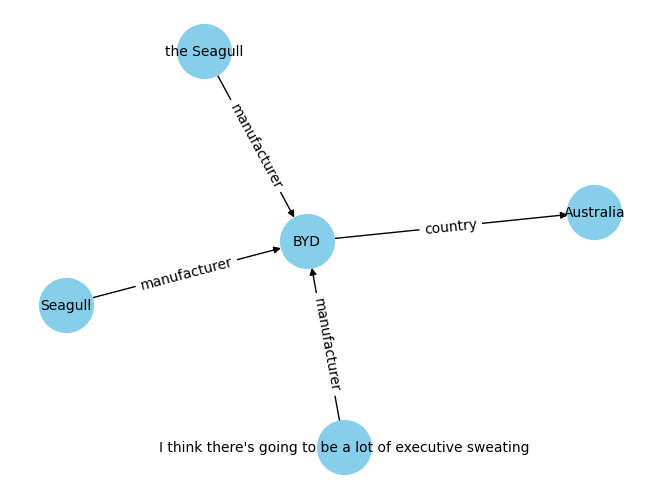

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

def save_network_graph(kb, related_entity='BYD', filename='network_byd_related.png'):
    G = nx.DiGraph()

    for relation in kb.relations:
        head, tail = relation["head"], relation["tail"]

        # Check if the relation involves the specified entity
        if head == related_entity or tail == related_entity:
            G.add_node(head)
            G.add_node(tail)
            G.add_edge(head, tail, label=relation["type"])

    # Only proceed if the graph is not empty
    if len(G.nodes) > 0:
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.savefig(filename)
        plt.show()
    else:
        print(f"No relations found related to {related_entity}")

# Example usage: visualize relations related to 'BYD'
save_network_graph(kb, related_entity='BYD')
